## Business Understanding

Choose stakeholder and figure out what they care about

- need two important parameter estimates as recommendations


## Exploratory Data Analysis

How/why does this data allow you to answer your questions?

**Data Visualization**
- Need 3 High Quality Data Visualizations

## Data Prep/Feature Eng

**Train/Test/Split**

**General Data Preparation**
- Nulls/dupes/outliers
- scaling
- transformations (for linearity)

**Feature Engineering**
- Encoding Variables (categories)
- Polynomial Features
- Interaction Terms
- NEED ONE NON-NUMERIC FEATURE

## Iterative Modeling

First try simplest approach.

Consider what the model baseline is

Start Adding Complexity and compare along the way
(**DOCUMENT THE ITERATIVE PROCESS**)

Models need to adhere to the assumptions of linear regression. If models do not adhere need to at least show that assumptions were tested for:

**ASSUMPTIONS**
- linear relationship between x and y - Heatmaps, scatter matrix
- low multicollinearituy - heatmaps, scatter matrix, VIF
- normal distribution of errors - kde, histogram, QQ-Plot, quantitative check (Jarque-Bera)
- homoskedasticity between errors - scatter plot between true and expected value

## Model Interpretation

Check for statistical Significance - check p-values of input variables

Are coefficients interpretable

Check R2, RMSE, MAE, MSE and other regression metrics

-----------------------


## STAKEHOLDER SELECTION

Stakeholder is Redfin

- Develop model to determine optimal purchasing price of homes and what renovations to make that will lead to greatest ROI


## BUSINESS UNDERSTANDING

**70% Rule:**

$$ 
MBP = (0.7ARV) - ERC
$$

where:

MBP = Maximum Buying Price

ARV = After-repair value

ERC = Estimated repair costs

in a buyers market we can adjust 70% to as high as 85%

## DATA EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [2]:
num_features_to_select = 5
longitude_condition = False
latitude_condition = True

In [3]:
df = pd.read_csv('data/cleaned_data.csv')
df.drop(['id','date','Unnamed: 0','yr_renovated','sqft_living15'],axis=1,inplace=True)
df = df[df['yr_built'] > 1930]
df.reset_index(drop=True,inplace=True)
if latitude_condition:
    df = df[df['lat'] < df['lat'].mean() + .05]
if longitude_condition:
    df = df[df['long'] > df['long'].mean()]

In [4]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,has_basement,yr_built,zipcode,lat,long,sqft_lot15,living_area
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,5650,0.880597
2,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,98003,47.3097,-122.327,6819,0.766309
3,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,1,1960,98146,47.5123,-122.337,8113,1.000000
7,230000.0,3,1.00,1250,9774,1.0,0,0,4,7,1250,0,1969,98003,47.3343,-122.306,8850,0.976562
9,285000.0,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,98092,47.3266,-122.169,7005,1.013393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,293000.0,2,2.25,1610,1968,2.0,0,0,4,7,1610,0,1979,98056,47.5184,-122.196,1968,0.825641
10685,360000.0,4,1.75,2010,12188,1.0,0,0,4,7,1150,1,1960,98059,47.5013,-122.147,8475,1.168605
10686,513000.0,3,2.50,2150,161607,2.0,0,0,3,7,1330,1,1995,98038,47.4178,-121.937,207781,0.895833
10693,294570.0,3,1.00,1140,8400,1.0,0,0,4,7,1140,0,1960,98059,47.5022,-122.144,9000,0.814286


In [5]:
from folium.plugins import FastMarkerCluster
import folium

lat = 47.4
long = -122.0

my_map = folium.Map([lat, long], zoom_start=10)



# add all the point from the file to the map object using FastMarkerCluster
my_map.add_child(FastMarkerCluster(df[['lat', 'long']].values.tolist()))

In [6]:
# sns.set(rc={'figure.figsize':(15, 15)})

# # Use the .heatmap method to depict the relationships visually!
# sns.heatmap(df.corr().abs(),annot=True);

In [7]:
# df_base = pd.read_csv('data/kc_house_data.csv')
# df_base.drop(['id','date','yr_renovated'],axis=1,inplace=True)
# df_base_corrs = df_base.corr()['price'].map(abs).sort_values(ascending=False)

In [8]:
df_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

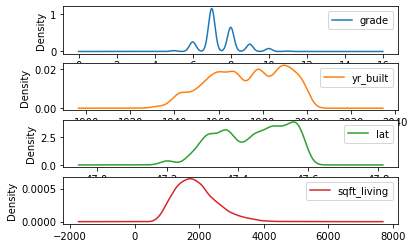

In [9]:
df.filter(['grade','yr_built','lat','sqft_living'],axis=1).plot.kde(subplots=True,sharex=False)

In [10]:
# fig,axes = plt.subplots(nrows=2,ncols=2)

# df['grade'].hist(bins=9,ax=axes[0,0],legend=True)
# df['yr_built'].hist(bins=9,ax=axes[0,1],legend=True)
# df['sqft_living'].hist(bins=12,ax=axes[1,0],legend=True)
# df['lat'].hist(bins=10,ax=axes[1,1],legend=True)

In [11]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'has_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15',
       'living_area'],
      dtype='object')

In [12]:
# floors, waterfront, sqft_above, yr_built, zipcode, lat, long, sqft_lot15, living_area
# df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'grade', 'sqft_above', 'has_basement']]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,has_basement,yr_built,zipcode,lat,long,sqft_lot15,living_area
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,5650,0.880597
2,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,98003,47.3097,-122.327,6819,0.766309
3,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,1,1960,98146,47.5123,-122.337,8113,1.000000
7,230000.0,3,1.00,1250,9774,1.0,0,0,4,7,1250,0,1969,98003,47.3343,-122.306,8850,0.976562
9,285000.0,5,2.50,2270,6300,2.0,0,0,3,8,2270,0,1995,98092,47.3266,-122.169,7005,1.013393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,293000.0,2,2.25,1610,1968,2.0,0,0,4,7,1610,0,1979,98056,47.5184,-122.196,1968,0.825641
10685,360000.0,4,1.75,2010,12188,1.0,0,0,4,7,1150,1,1960,98059,47.5013,-122.147,8475,1.168605
10686,513000.0,3,2.50,2150,161607,2.0,0,0,3,7,1330,1,1995,98038,47.4178,-121.937,207781,0.895833
10693,294570.0,3,1.00,1140,8400,1.0,0,0,4,7,1140,0,1960,98059,47.5022,-122.144,9000,0.814286


In [13]:
# Create Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.2, random_state=30)

In [14]:
# Fit Scalar to Train
ss = StandardScaler()
ss.fit(X_train)

# Transform both Train and Test
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [15]:
# Recursive Feature Selection
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=num_features_to_select)
select.fit(X=X_train_scaled, y=y_train)


keep_list = [(k,v) for k,v in zip(df.drop('price', axis=1).columns,select.support_)]
keep_string = ''
for k,v in keep_list:
    if v:
        keep_string += k + '+'
keep_string = keep_string[:-1]

In [16]:
keep_string

'sqft_living+view+grade+zipcode+lat'

In [17]:
# Creates scaled features dataframe and then adds on price column

# Train
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = df.drop('price', axis=1).columns
y_train.reset_index(drop=True,inplace=True)
X_train_scaled_final = pd.concat((X_train_scaled,y_train),axis=1)

# Test
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = df.drop('price', axis=1).columns
y_test.reset_index(drop=True,inplace=True)
X_test_scaled_final = pd.concat((X_test_scaled,y_test),axis=1)

In [18]:
# Baseline Model
baseline_mean = X_train_scaled_final['price'].mean()
model_base = DummyRegressor(strategy='mean', constant=baseline_mean)
baseline_mean

390520.47704233753

In [19]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'has_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_lot15',
       'living_area'],
      dtype='object')

In [20]:
formula = f'price ~ {keep_string}'
# formula = f'price ~ sqft_living+view+grade'
model = ols(formula,X_train_scaled_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     3474.
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:42:09   Log-Likelihood:                -64677.
No. Observations:                5031   AIC:                         1.294e+05
Df Residuals:                    5025   BIC:                         1.294e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.905e+05   1307.205    298.745      0.000    3.88e+05    3.93e+05
sqft_living  7.121e+04   2067.448     34.445      0.000    6.72e+04    7.53e+04
view          3.41e+04   1373.265     24.829      0.000    3.14e+04    3.68e+04
grade         4.85e+04   2047.612     23.686      0.000    4.45e+04    5.25e+04
zipcode     -3.074e+04   1435.579    -21.412      0.000   -3.36e+04   -2.79e+04
lat          9.379e+04   1398.702     67.058      0.000    9.11e+04    9.65e+04
==============================================================================
Omnibus:                      759.063   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.877
Skew:                           0.874   Prob(JB):                         0.00
Kurtosis:                       5.286   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model_test = ols(formula,X_test_scaled_final).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     766.3
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:42:09   Log-Likelihood:                -16218.
No. Observations:                1258   AIC:                         3.245e+04
Df Residuals:                    1252   BIC:                         3.248e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.897e+05   2720.245    143.273      0.000    3.84e+05    3.95e+05
sqft_living  6.574e+04   4185.792     15.706      0.000    5.75e+04     7.4e+04
view         3.084e+04   2772.458     11.122      0.000    2.54e+04    3.63e+04
grade        5.373e+04   4129.423     13.012      0.000    4.56e+04    6.18e+04
zipcode     -2.813e+04   3004.477     -9.363      0.000    -3.4e+04   -2.22e+04
lat          9.751e+04   2983.134     32.687      0.000    9.17e+04    1.03e+05
==============================================================================
Omnibus:                      264.105   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.724
Skew:                           1.070   Prob(JB):                    1.17e-162
Kurtosis:                       6.106   Cond. No.                         2.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""